In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import random

In [8]:
def generate_standard_normal_vector():
    """Generates a standard normal vector x in R^2."""
    return np.random.randn(2)

def compute_inner_products(x, A):
    """Computes the inner products between x and each row of A.
    
    Args:
        x (np.ndarray): A 2D vector of shape (2,).
        A (np.ndarray): A matrix of shape (n,2), where each row is a vector in R^2.
    
    Returns:
        np.ndarray: Inner products of shape (n,).
    """
    return A @ x  # Equivalent to np.dot(A, x)

def plot_A(A):
    """Plots the set of vectors in A.
    
    Args:
        A (np.ndarray): A matrix of shape (n,2), where each row is a vector in R^2.
    """
    plt.scatter(A[:, 0], A[:, 1], color='blue', label='Vectors in A')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of Vectors in A')
    # plt.legend()
    plt.grid()
    plt.show()

In [9]:
A = np.array([[0, 1], [1, 0], [-1,1]])  # Example set of vectors in R^2
repeat =10000

In [12]:
counts=[0]*len(A)
for ignore in range(repeat):
    x = generate_standard_normal_vector()
    inner_products = compute_inner_products(x, A)
    counts[np.argmax(inner_products)]+=1

print(counts)

[1284, 4465, 4251]


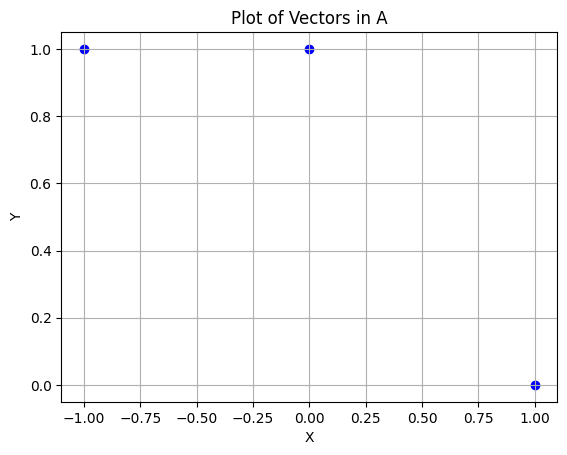

In [11]:
plot_A(A)

In [103]:
M=10
K=5

def trial():
    U=[random.randint(1, 10) for p in range(M)]
    E=[random.randint(1, U[p]) for p in range(M)]
    rankU=np.array([sorted(U,reverse = True).index(x)+1 for x in U])
    rankE=np.array([sorted(E,reverse = True).index(x)+1 for x in E])
    A=bound_enumeration(U,E)
    inter=[]
    union=[]
    for i in range(M):
        if (rankE[i]<=K)|(rankU[i]<=K):
            union+=[i]
            if (rankE[i]<=K)&(rankU[i]<=K):
                inter+=[i]
            # print(rankE[i])
            # print(rankU[i])
    if any([set(Ai).issubset(union) for Ai in A])==False:
        print(inter)
        print(A)
        # print(inter,J(U,E,inter))
        # print(A,J(U,E,A))
#set(inter).issubset(A)

In [79]:
U=[random.randint(1, 100) for p in range(M)]
E=[random.randint(1, U[p]) for p in range(M)]
rankU=np.array([sorted(U,reverse = True).index(x)+1 for x in U])
rankE=np.array([sorted(E,reverse = True).index(x)+1 for x in E])
bound_enumeration(U,E)

[[1, 2, 7, 8, 9], [1, 6, 7, 8, 9]]

In [104]:
for i in range(1000):
    trial()

In [7]:
U

[89, 95, 18, 53, 86, 80]

In [8]:
E

[21, 2, 11, 10, 56, 70]

In [9]:
print(rankU[A])
print(rankU)

[2 3 4]
[2 1 6 5 3 4]


In [10]:
print(rankE[A])
print(rankE)

[3 2 1]
[3 6 4 5 2 1]


In [71]:
def generate_combinations(numbers, r):
    return list(combinations(numbers, r))

def J(Ulist,Elist,A):
    U=np.array(Ulist)
    E=np.array(Elist)
    Ac=list(set([*range(M)])-set(A))
    return np.max(U[Ac])-np.min(E[A])

def bound_enumeration(Ulist,Elist):
        U=np.array(Ulist)
        E=np.array(Elist)
        # Generate combinations
        numbers = [*range(M)]
        comb = generate_combinations(numbers, K)
        minexp=1000
        optA=[]
        for c in comb:
            A=list(c)
            # Ac=list(set(numbers)-set(c))
            # exp=np.max(U[Ac])-np.min(E[A])
            exp=J(U,E,A)
            if minexp > exp:
                minexp = exp
                optA = [A]
            elif minexp == exp:
                 optA +=[A] 
        return optA #, minexp